# 3

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

In [2]:
def print_metrics(y_test, y_pred, model, X_test):
    matrix = confusion_matrix(y_test, y_pred)

    tn = matrix[0, 0]
    tp = matrix[1, 1]
    fn = matrix[1, 0]
    fp = matrix[0, 1]

    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)

    print('accuracy =', accuracy_score(y_test, y_pred),
          '\nTPR =', tpr,
          '\nTNR =', tnr, '\n')

    print(classification_report(y_test, y_pred))

    plot_roc_curve(model, X_test, y_test)
    plt.plot(1 - tpr, tnr, "x", c="red")
    plt.show()

accuracy = 0.9463087248322147 
TPR = 0.9347826086956522 
TNR = 0.9514563106796117 

              precision    recall  f1-score   support

   Luminal A       0.97      0.95      0.96       103
   Luminal B       0.90      0.93      0.91        46

    accuracy                           0.95       149
   macro avg       0.93      0.94      0.94       149
weighted avg       0.95      0.95      0.95       149



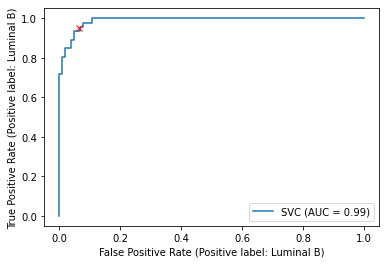

In [3]:
path = 'https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar16/BRCA_pam50.tsv'
data = pd.read_csv(path, sep='\t', index_col=0)
data = data.loc[data['Subtype'].isin(['Luminal A', 'Luminal B'])]

X = data.iloc[:, :-1].to_numpy()
y = data['Subtype'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_metrics(y_test, y_pred, model, X_test)

In [4]:
tmp = data.iloc[:, :-1].copy()
tmp.loc['coef'] = model.coef_[0]
top = tmp.T.sort_values(['coef'], ascending=False, key=abs).head().index.tolist() + ['Subtype']
top

['FOXC1', 'BAG1', 'MELK', 'UBE2T', 'KRT17', 'Subtype']

accuracy = 0.9060402684563759 
TPR = 0.8478260869565217 
TNR = 0.9320388349514563 

              precision    recall  f1-score   support

   Luminal A       0.93      0.93      0.93       103
   Luminal B       0.85      0.85      0.85        46

    accuracy                           0.91       149
   macro avg       0.89      0.89      0.89       149
weighted avg       0.91      0.91      0.91       149



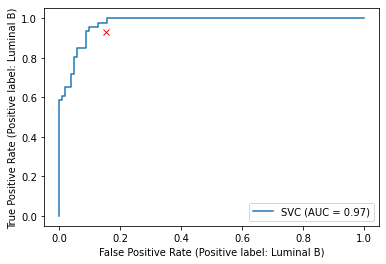

In [5]:
preproc = data[top]

X = preproc.iloc[:, :-1].to_numpy()
y = preproc['Subtype'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_metrics(y_test, y_pred, model, X_test)

# 4

In [6]:
data = pd.read_csv(path, sep='\t', index_col=0)
print(data.shape)

(915, 51)


In [7]:
X = data.iloc[:, :-1].to_numpy()
y = data['Subtype'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)

model = SVC(kernel="linear", decision_function_shape='ovr')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('accuracy =', accuracy_score(y_test, y_pred), '\n')

print('conf matrix:\n', confusion_matrix(y_test, y_pred), '\n', sep='')

print(classification_report(y_test, y_pred))

accuracy = 0.9301310043668122 

conf matrix:
[[ 16   0   0   0   0   0]
 [  0  24   0   0   1   0]
 [  1   0 101   0   1   0]
 [  1   0   9  36   0   0]
 [  1   1   1   0   2   0]
 [  0   0   0   0   0  34]]

                 precision    recall  f1-score   support

  HER2-enriched       0.84      1.00      0.91        16
        Healthy       0.96      0.96      0.96        25
      Luminal A       0.91      0.98      0.94       103
      Luminal B       1.00      0.78      0.88        46
    Normal-like       0.50      0.40      0.44         5
Triple-negative       1.00      1.00      1.00        34

       accuracy                           0.93       229
      macro avg       0.87      0.85      0.86       229
   weighted avg       0.93      0.93      0.93       229



In [8]:
pca = PCA(n_components=2)

X = data.iloc[:, :-1].to_numpy()
X = pca.fit_transform(X)
y = data['Subtype'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)

model = SVC(kernel="linear", decision_function_shape='ovr')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('accuracy =', accuracy_score(y_test, y_pred), '\n')

print('conf matrix:\n', confusion_matrix(y_test, y_pred), '\n', sep='')

print(classification_report(y_test, y_pred))

accuracy = 0.9082969432314411 

conf matrix:
[[11  0  1  3  1  0]
 [ 0 24  1  0  0  0]
 [ 1  0 97  4  1  0]
 [ 1  0  5 40  0  0]
 [ 0  1  1  0  3  0]
 [ 0  0  0  0  1 33]]

                 precision    recall  f1-score   support

  HER2-enriched       0.85      0.69      0.76        16
        Healthy       0.96      0.96      0.96        25
      Luminal A       0.92      0.94      0.93       103
      Luminal B       0.85      0.87      0.86        46
    Normal-like       0.50      0.60      0.55         5
Triple-negative       1.00      0.97      0.99        34

       accuracy                           0.91       229
      macro avg       0.85      0.84      0.84       229
   weighted avg       0.91      0.91      0.91       229



# 5

time =  0.009143352508544922
accuracy = 1.0 
TPR = 1.0 
TNR = 1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       1.00      1.00      1.00      2500

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



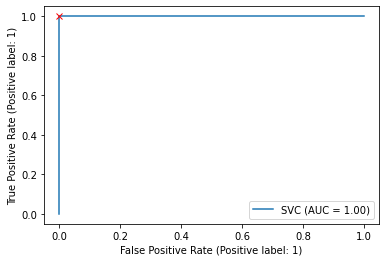

In [9]:
N = 10000
X1 = np.random.normal(loc=0, size=(N, 2))
X2 = np.random.normal(loc=10, size=(N, 2))
X = np.vstack([X1, X2])
y = np.array([0]*N + [1]*N)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=13)
model = SVC(kernel="linear")
start_time = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("time = " , time.time() - start_time)

print_metrics(y_test, y_pred, model, X_test)

time =  8.468066215515137
accuracy = 0.4894 
TPR = 0.4964 
TNR = 0.4824 

              precision    recall  f1-score   support

           0       0.49      0.48      0.49      2500
           1       0.49      0.50      0.49      2500

    accuracy                           0.49      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.49      0.49      0.49      5000



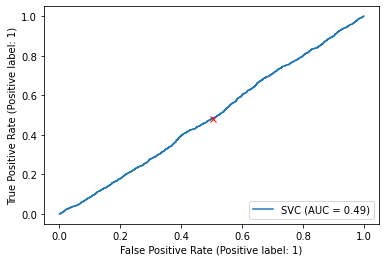

In [10]:
N = 10000
X1 = np.random.normal(loc=0, size=(N, 2))
X2 = np.random.normal(loc=0, size=(N, 2))
X = np.vstack([X1, X2])
y = np.array([0]*N + [1]*N)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=13)
model = SVC(kernel="linear")
start_time = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("time = " , time.time() - start_time)

print_metrics(y_test, y_pred, model, X_test)